<a href="https://colab.research.google.com/github/joiortega1/Deep_Learning/blob/main/Tarea1/Tarea1_Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Perceptrón y Redes Densas

- Ortega Ibarra Jaime Jesus

3. Entrena una red completamente conectada para aproximar la compuerta XOR

Importamos librerías a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

Con ayuda de Numpy creamos nuestra compuerta $XOR$

In [139]:
x_train = np.array([[1,0],[0,0],[0,1],[1,0],[1,1],[0,1]], dtype = "float32")
y_train = np.array([[1],[0],[1],[1],[0],[1]], dtype = "float32")
x_test = np.array([[1,1],[1,0],[0,1],[1,0],[1,1],[0,1]], dtype = "float32")
y_test = np.array([[0],[1],[1],[1],[0],[1]], dtype = "float32")

In [140]:
tensor_X = torch.tensor(x_train).type(torch.float32)
tensor_y = torch.tensor(y_train).view(-1, 1).type(torch.float32)
dl_train = DataLoader(TensorDataset(tensor_X,tensor_y), batch_size=5)
dl_train.batch_size
tensor_X_test = torch.tensor(x_test).type(torch.float32)
tensor_y_test = torch.tensor(y_test).view(-1, 1).type(torch.float32)
dl_test = DataLoader(TensorDataset(tensor_X_test, tensor_y_test), batch_size=5)

Con ayuda de las libretas vistas en clase, creamos nuestras funciones para entrenamiento

In [141]:
def Model():
  model = nn.Sequential(
    nn.Linear(2,35),
    nn.ReLU(),
    nn.Linear(35,15),
    nn.ReLU(),
    nn.Linear(15,10),
    nn.Sigmoid(),
    nn.Linear(10,1),
    nn.Sigmoid())
  return model


def eval_epoch(dl, model):
    with torch.no_grad():
        loss_list = []
        accuracy_count = 0
        for x, y_true in dl:
            y_lgts = model(x)
            loss = F.binary_cross_entropy(y_lgts, y_true)
            loss_list.append(loss)
            
            y_pred = y_lgts.round()
            accuracy_count += (y_pred == y_true).sum()
        
        accuracy = accuracy_count/(len(dl)*(dl.batch_size))
        mean_loss = np.mean(loss_list)
        
        return accuracy, mean_loss

def train(model, tst_dl, trn_dl, lr=1e-3,epochs=1000, verbose=False):
    loss_hist, acc_hist = [], []
    opt = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):

        loss_hist = []
        for x, y_true in trn_dl:
            y_lgts = model(x)
            loss = F.binary_cross_entropy(y_lgts, y_true)
            opt.zero_grad()
            loss.backward()
            opt.step()
            hist_perd = loss.item() * 100
            loss_hist.append(hist_perd)
        acc_hist.append(np.mean(loss_hist))
    eval = eval_epoch(tst_dl, model)    
    return acc_hist, loss_hist, eval

In [142]:
model = Model()
acc_hist, loss_hist, eval = train(model, dl_test, dl_train)
print(eval)

(tensor(0.4000), 0.5205767)


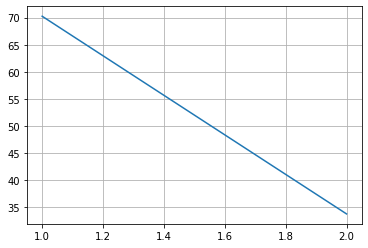

In [143]:
plt.plot(np.arange(1,len(loss_hist)+1),loss_hist)
plt.grid()